#Capstone Project - The Battle of Neighborhoods

##"San Francisco safe travel and restaurant visits"

###1. Introduction

* 1. A description of the problem and a discussion of the background. 

샌프란시스코는 미국에서 꽤 큰 도시로 비즈니스, 금융, 교통의 중심 허브이다. 이 도시는 많은 관광객들을 위한 매력적이 도시임에 틀림 없다. 다만, 안타깝게도 이러한 도시에서 2016년도 한 해 동안 다양한 범죄들이 발생 하였다. 나는 샌프란시스코의 시간 및 지역 별 범죄 패턴을 분석하여 관광객들을 위해 보다 안전하고 좋은 지역을 소개하고, 방문하기 좋은 식당을 추천 하고자 한다.


San Francisco is a fairly large city in the United States, the hub of business, finance, and transportation. This city must be an attractive city for many tourists. Unfortunately, a variety of crimes occurred in this city during 2016. I would like to analyze San Francisco's crime patterns by time and region to introduce safer and better neighborhoods for tourists and to recommend good restaurants to visit.

* 2. A description of the data and how it will be used to solve the problem. 

데이터는 다음의 링크에서 구할 수 있다. 이 데이터의 경우, 범죄의 발생 시간, 범죄의 종류, 범죄 발생 지역 등의 정보를 포함하고 있다. 이러한 데이터를 분석하고 시각화 함으로써 위험한 리스크를 피하는데 유용한 사전 정보로 활용하려고 한다. 게다가 Foursquare API를 이용하여 샌프란시스코 지역의 식당 위치와 종류 등의 데이터를 바탕으로 필요한 정보로 추가하고자 한다. 

The data can be obtained from the following link. This data includes information such as the time of crime, the type of crime, and the area where the crime occurred. By analyzing and visualizing this data, we will use it as proactive information to help us avoid dangerous risks. In addition, we will use the Foursquare API to add the necessary information based on data such as the location and type of restaurants in the San Francisco area.

The Information that can affect data based on the problems we define : 

* Time of Crime
* Day of Crime
* Location of Crime
* Location of Restaurants
* Map of San Francisco

### 2. Import module and data for our project

In [0]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

#### 2.1 Loading the Crime data of San Francisco

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


Extraction data for criminal issue

In [3]:
df = df[df.Category != 'NON-CRIMINAL']
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",16000313026150


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132634 entries, 0 to 150499
Data columns (total 13 columns):
IncidntNum    132634 non-null int64
Category      132634 non-null object
Descript      132634 non-null object
DayOfWeek     132634 non-null object
Date          132634 non-null object
Time          132634 non-null object
PdDistrict    132633 non-null object
Resolution    132634 non-null object
Address       132634 non-null object
X             132634 non-null float64
Y             132634 non-null float64
Location      132634 non-null object
PdId          132634 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 14.2+ MB


<Each column's explain>

1.IncidntNum: Incident Number

2.Category: Category of crime or incident

3.Descript: Description of the crime or incident

4.DayOfWeek: The day of week on which the incident occurred

5.Date: The Date on which the incident occurred

6.Time: The time of day on which the incident occurred

7.PdDistrict: The police department district

8.Resolution: The resolution of the crime in terms whether the perpetrator was 
arrested or not

9.Address: The closest address to where the incident took place

10.X: The longitude value of the crime location

11.Y: The latitude value of the crime location

12.Location: A tuple of the latitude and the longitude values

13.PdId: The police department ID


We count numbers of crime for each category : 39 categories

In [5]:
df_cat = pd.DataFrame(df.groupby(by=['Category']).count())
df_cat.shape

(38, 12)

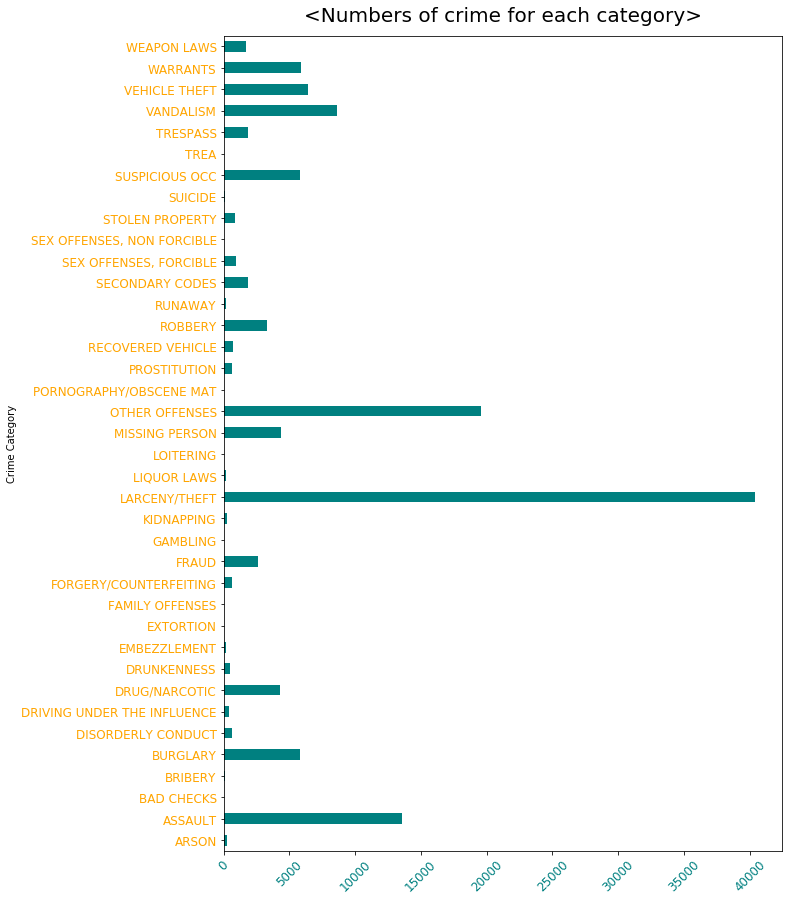

In [6]:
df_cat['IncidntNum'].plot(kind='barh',
                            figsize=(10,15),
                            color='teal'
                            )
#plt.legend(labels= df_C_cnt.index, loc='upper right')
plt.xticks(rotation=45, color='teal', size=12)
plt.yticks(rotation=0, color='orange', size=12)
plt.ylabel('Crime Category')
plt.title('<Numbers of crime for each category>', position=(0.5, 1.0+0.01),fontsize=20)

plt.show()

San Francisco's crimes are classified into 39 types. The most common types of crime were LARCENY/THEFT. This type of crime can be considered a dangerous threat for visitors to the city.

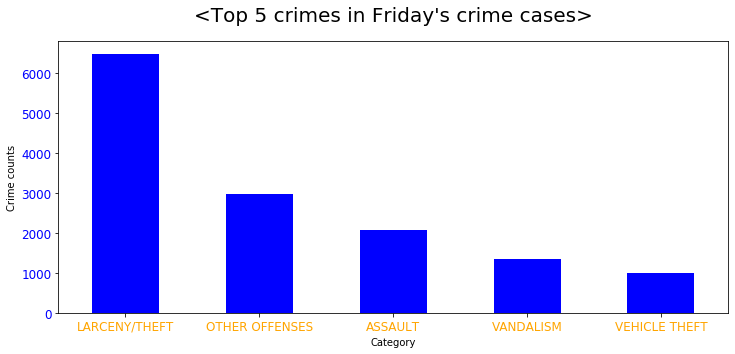

In [7]:
df_fri = df[df.DayOfWeek == 'Friday']
df_cat_fri = pd.DataFrame(df_fri.groupby(by=['Category']).count())
df_cat_fri.sort_values(by='IncidntNum', ascending=False, inplace=True)
#df_cat_fri.head(5)

df_cat_fri.head(5)['IncidntNum'].plot(kind='bar',
                            figsize=(12,5),
                            color='blue'
                            )
#plt.legend(labels= df_C_cnt.index, loc='upper right')
plt.xticks(rotation=0, color='orange', size=12)
plt.yticks(rotation=0, color='blue', size=12)
plt.ylabel('Crime counts')
plt.title('<Top 5 crimes in Friday\'s crime cases>', position=(0.5, 1.0+0.05),fontsize=20)
plt.show()

We looked at the top 5 crimes in Friday's crime cases. In the ranking of the top 5 crime types in addition to LARCENY / THEFT, tourists need to be cautious about being exposed to violent situations such as Other offenses, Assault, Vandalism, vehicle theft or renting a car.


We count numbers of crime for each days : From Monday to Sunday

In [8]:
df_C_day = df.groupby(df.DayOfWeek).count()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_C_day.reindex(cats)

,IncidntNum,Category,Descript,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
DayOfWeek,,,,,,,,,,,,
Monday,18379,18379,18379,18379,18379,18379,18379,18379,18379,18379,18379,18379
Tuesday,18814,18814,18814,18814,18814,18814,18814,18814,18814,18814,18814,18814
Wednesday,18862,18862,18862,18862,18862,18862,18862,18862,18862,18862,18862,18862
Thursday,18874,18874,18874,18874,18874,18874,18874,18874,18874,18874,18874,18874
Friday,20489,20489,20489,20489,20489,20489,20489,20489,20489,20489,20489,20489
Saturday,19450,19450,19450,19450,19450,19450,19450,19450,19450,19450,19450,19450
Sunday,17766,17766,17766,17766,17766,17765,17766,17766,17766,17766,17766,17766


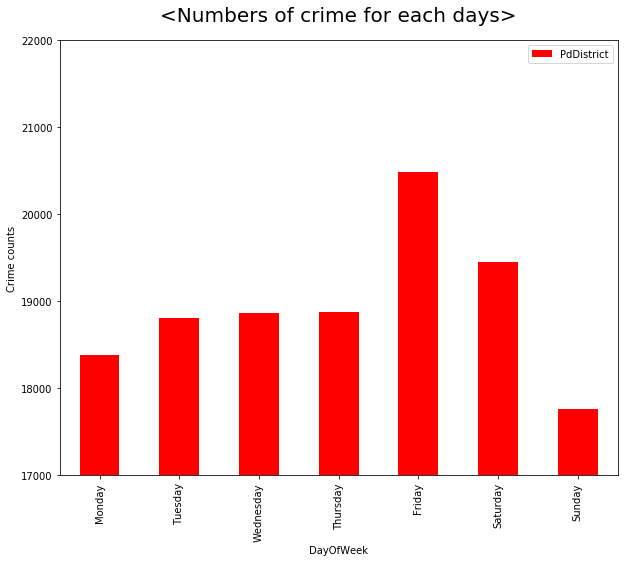

In [9]:
df_C_day_count = df_C_day[['PdDistrict']]
df_C_day_count = df_C_day_count.astype(float).reindex(cats)
df_C_day_count.plot(kind='bar',
                    color='red',
                    figsize=(10,8))

plt.ylim(17000, 22000)
plt.ylabel('Crime counts')
plt.title('<Numbers of crime for each days>', position=(0.5, 1.0+0.03),fontsize=20)
plt.show()

When analyzing the number of crimes per day, many crimes occurred on Friday and Saturday. On days where you enjoy more culture than on weekdays, you may find that there are more threats. This is not good for tourists, but you can see less crime on Sundays.

Changes in crime by time



In [0]:
df_t = pd.DataFrame(df.groupby(by=['Time']).count())

In [0]:
hour_list = []
tmp_sum = 0
cnt = 1

for i in df_t['Category'] :
    
    cnt = cnt + 1 

    tmp_sum = tmp_sum + i
    if(cnt%60 == 0) :
        hour_list.append(tmp_sum)
        tmp_sum = 0 
        #print(cnt)     

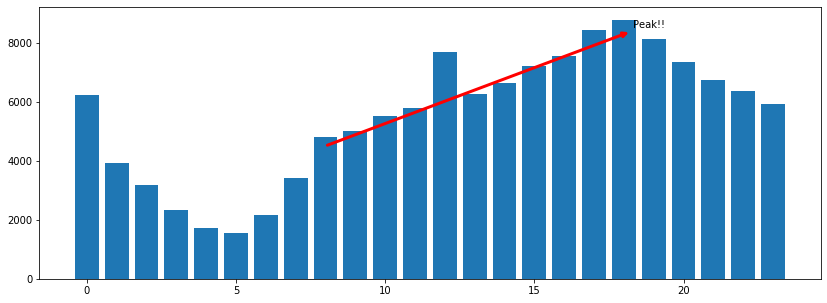

In [49]:
x = range(len(hour_list))
plt.rcParams["figure.figsize"] = (14,5)
plt.rcParams['axes.grid'] = False
plt.bar(x, hour_list)

# Annotate arrow
plt.annotate('Peak!!',                      # s: str. Will leave it blank for no text
             xytext=(18.3, 8500),             # place head of the arrow at point (year 2012 , pop 70)
             xy=(8, 4500),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='<-', connectionstyle='arc3', color='red', lw=3)
            )
plt.show()

When we observed the change in crime over time, more crimes occurred in the afternoon than in the morning. In particular, at peak time 6 pm when the dinner was active, the most crimes occurred back and forth.

## Map of crime occurrence in San Francisco on weekdays
-----

In [13]:
df_NC = pd.DataFrame(df['PdDistrict'].value_counts())
df_NC.reset_index(inplace=True)
df_NC.columns = ['Neighborhood', 'Count']
df_NC

,Neighborhood,Count
0,SOUTHERN,25043
1,NORTHERN,18047
2,MISSION,17242
3,CENTRAL,15356
4,BAYVIEW,12991
5,INGLESIDE,10358
6,TARAVAL,9901
7,TENDERLOIN,8563
8,RICHMOND,7676
9,PARK,7456


In [14]:
# download countries geojson file
!wget --quiet https://cocl.us/sanfran_geojson -O san-francisco.geojson
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [0]:
sanf_geo = r'san-francisco.geojson' # geojson file

## Most dangerous for tourist : Larceny/Theft of crime occurrence

In [0]:
df_the = df[df.Category == 'LARCENY/THEFT']
#df_the.shape
limit = 100
df_lim_the = df_the.iloc[0:limit, :]

df_oth = df[df.Category == 'OTHER OFFENSES']
df_lim_oth = df_oth.iloc[0:limit, :]

In [53]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# display the map of San Francisco
sanfran_map.choropleth(
    geo_data=sanf_geo,
    data=df_NC,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    #threshold_scale=threshold_scale, 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco',
    reset=True
)

for lat, lng, label in zip(df_lim_the.Y, df_lim_the.X, df_lim_the.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(sanfran_map)
    
sanfran_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


When observed based on the LARCENY / THEFT crime type, it can be seen that the entire crime occurrence is distributed in a pattern similar to the above. In particular, there is a pattern of crimes that are spread evenly in SOUTHERN, NORTHERN, MISSION, and CENTRAL areas that attract a lot of tourists.

OTHER OFFENSES show a pattern similar to Larceny/Theft



In [54]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# display the map of San Francisco
sanfran_map.choropleth(
    geo_data=sanf_geo,
    data=df_NC,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    #threshold_scale=threshold_scale, 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco',
    reset=True
)

for lat, lng, label in zip(df_lim_oth.Y, df_lim_oth.X, df_lim_oth.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(sanfran_map)
    
sanfran_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


When observed based on the other crime type, it also can be seen that the entire crime occurrence is distributed in a pattern similar to the above. In particular, there is a pattern of crimes that are spread evenly in SOUTHERN, NORTHERN, MISSION, and CENTRAL areas that attract a lot of tourists. 

Other crime types also follow the overall distribution. Therefore, we would like to select the area of ​​the state where the threat would be against LARCENY / THETF, which would be the most threat to tourists.

### Visualizing San Francisco Restaurant Information with Foursquare

---



In [19]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [20]:
CLIENT_ID = 'U0FWCNN1BBUIBFVTY03UP4FBAYRCXCYS53DRFXR2Y3MXDEVZ'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET = '2MIZJDFDCTSFQDTC5LEDHVYMK1OBIBMDPIHDZYUZB5NB5LEC'#'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 300
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: U0FWCNN1BBUIBFVTY03UP4FBAYRCXCYS53DRFXR2Y3MXDEVZ
CLIENT_SECRET:2MIZJDFDCTSFQDTC5LEDHVYMK1OBIBMDPIHDZYUZB5NB5LEC


In [21]:
address = '501 Twin Peaks Blvd, San Francisco, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.756481 -122.446784


Getting the data of Chinese restaurant

In [22]:
search_query = 'chinese'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#url
results = requests.get(url).json()
#results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
#dataframe.head()
#dataframe.shape
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
dataframe_filtered_c = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_c['categories'] = dataframe_filtered_c.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_c.columns = [column.split('.')[-1] for column in dataframe_filtered_c.columns]
dataframe_filtered_c = dataframe_filtered_c[(dataframe_filtered_c['categories']=='Chinese Restaurant') | (dataframe_filtered_c['categories']=='Restaurant')]

dataframe_filtered_c.shape

chinese .... OK!


(10, 16)

Getting data of Italian Restaurant 

In [23]:
search_query = 'italian'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#url
results = requests.get(url).json()
#results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
#dataframe.head()
#dataframe.shape
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_i = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_i['categories'] = dataframe_filtered_i.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_i.columns = [column.split('.')[-1] for column in dataframe_filtered_i.columns]

dataframe_filtered_i = dataframe_filtered_i[(dataframe_filtered_i['categories']=='Italian Restaurant') | (dataframe_filtered_i['categories']=='Restaurant')]

dataframe_filtered_i.shape

italian .... OK!


(15, 16)

Getting data of restaurant

In [24]:
search_query = 'restaurant'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#url
results = requests.get(url).json()
#results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
#dataframe.head()
#dataframe.shape
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_r = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_r['categories'] = dataframe_filtered_r.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_r.columns = [column.split('.')[-1] for column in dataframe_filtered_r.columns]
#dataframe_filtered_k = dataframe_filtered_k[(dataframe_filtered_k['categories']=='Restaurant')]

dataframe_filtered_r.shape

restaurant .... OK!


(50, 16)

In [25]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel


# display the map of San Francisco
venues_map.choropleth(
    geo_data=sanf_geo,
    data=df_NC,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    #threshold_scale=threshold_scale, 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco',
    reset=True
)

# add a red circle marker to represent the Conrad Hotel
'''
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)
'''


# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered_r.lat, dataframe_filtered_r.lng, dataframe_filtered_r.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, label in zip(df_lim_the.Y, df_lim_the.X, df_lim_the.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)

'''
for lat, lng, label in zip(dataframe_filtered_i.lat, dataframe_filtered_i.lng, dataframe_filtered_i.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)


for lat, lng, label in zip(dataframe_filtered_c.lat, dataframe_filtered_c.lng, dataframe_filtered_c.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
'''

# display map
venues_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


We searched restaurants location information (blue) in San Francisco using Foursquare Query information. And it is the result of simultaneously drawing LARCENY / THETF (yellow) which occurred in the vicinity.

## Extracted spots 100 meters between dangerous areas and restaurants
-------------

In [0]:
dist_crime_res = []

for _, row in dataframe_filtered_r[['name', 'lat', 'lng' ]].iterrows() : 
    #print(row['name'])
    lat = row['lat']
    lng = row['lng']

    min_dist = 100000
    for _, row_t in df_lim_the[['X','Y']].iterrows() :

        x = row_t['X']
        y = row_t['Y']

        dist = np.sqrt((lat-y)*(lat-y) + (lng-x)*(lng-x))

        if min_dist > dist : 
            min_dist = dist       

    dist_crime_res.append([min_dist, lat, lng])
    #print(min_dist)        

In [0]:
dist_ext = pd.DataFrame(dist_crime_res, columns=['dist', 'lat', 'lng'])

In [0]:
dist_ext_no = dist_ext[dist_ext.dist >= 0.003]
dist_ext = dist_ext[dist_ext.dist < 0.003]

In [0]:
df_risk_list = dataframe_filtered_r.iloc[dist_ext.index]
df_norisk_list = dataframe_filtered_r.iloc[dist_ext_no.index]

In [29]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around the Conrad Hotel


# display the map of San Francisco
venues_map.choropleth(
    geo_data=sanf_geo,
    data=df_NC,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    #threshold_scale=threshold_scale, 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco',
    reset=True
)

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered_r.lat, dataframe_filtered_r.lng, dataframe_filtered_r.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, label in zip(df_lim_the.Y, df_lim_the.X, df_lim_the.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng in zip(dist_ext.lat, dist_ext.lng):
    folium.CircleMarker(
        [lat, lng],
        radius=12, # define how big you want the circle markers to be
        color='red',
        fill=True,
        #popup=label,
        fill_color='red',
        fill_opacity=0.3
    ).add_to(venues_map)

# display map
venues_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


If the location of the restaurant and the location of LARCENY / THETF are less than 100 meters, then it is considered a dangerous point. If the restaurant is delicious and famous, tourists should pay attention to theft.

### Result review


San Francisco crimes are classified into 39 types. The most common type of crime is LARCENY / THEFT. This type of crime can be considered a dangerous threat to city visitors. In the crime case on Friday, we investigated the five major crimes. In addition to LARCENY / THEFT, tourists should be careful to be exposed to crimes such as other violations, assaults, vandalism and theft of vehicles. When analyzing the number of crimes per day, more crimes occurred on Fridays and Saturdays than on weekdays. This is not good for tourists, but less crime on Sundays. Over time, more crimes occurred in the afternoon than in the morning if we observed a change in crime. In particular, the highest number of crimes occurred at 6 pm, dinner time.

Observations based on the LARCENY / THEFT crime type reveal that they are distributed in a pattern similar to the total crime occurrence. There are even patterns of crime spreading evenly in the southern, northern, mission and central areas, which attract many tourists.
Other crime types follow the full distribution. Therefore, we want to give the state's information in advance by selecting the state areas that threaten LARCENY / THETF, which is the most threatening to tourists.

Retrieved restaurant location information in San Francisco using Foursquare Query information. And as a result of simultaneously drawing the LARCENY / THETF that occurred nearby, it is considered a dangerous point if the location of the restaurant and the location of the LARCENY / THETF are less than 100 meters. In these restaurants, tourists should pay attention to theft during dinner time.


### Conclusion

Using San Francisco's crime occurrence data and Foursquare information, a conclusion is made using San Francisco's restaurant location information. According to the analysis of the data, it is divided into a list of restaurants with a history of theft near 100 meters and a list of other restaurants as follows.


* List of restaurants in the area with high risk of theft

    -      Panchita's Pupuseria Restaurant #2
    -                       Tú Lan Restaurant
    -                      May Lee Restaurant
    -     Tuba - Authentic Turkish Restaurant
    -                         Restaurant Anzu
    -             Basil Thai Restaurant & Bar
    -                  MKT Restaurant and Bar
    -              Tony's Cable Car Restaurant
    -    The Restaurant Collection Under The Dome
    -              Akiko’s Restaurant & Sushi Bar
    -                         Sun Rise Restaurant
    -                      Heung Yuen Restaurant
    -                           Big 4 Restaurant
    -              Don Ramon's Mexican Restaurant
    -                       Mars Bar & Restaurant
    -           Ryoko's Japanese Restaurant & Bar
    -                         San Wang Restaurant
    -                 Clay Oven Indian Restaurant
    -                           Nena's Restaurant
    -                 Sai's Vietnamese Restaurant
    -                       New Ming's Restaurant
    -                      8 Immortals Restaurant

* List of restaurants in the area with low risk of thef
    -     San Tung Chinese Restaurant 山東小館 (San Tung Chi...
    -                           Cafe Bakery & Restaurant
    -                                    Kabuto Restaurant
    -                                     Eric's Restaurant
    -                          New Eritrea Restaurant & Bar
    -                              Henry's Hunan Restaurant
    -                  The Chieftain Irish Pub & Restaurant
    -                              Turtle Tower Restaurant
    -                          Evergreen Garden Restaurant
    -                                 Bullshead Restaurant
    -                                 City View Restaurant
    -                           Pa'ina Lounge & Restaurant
    -                                   Alice's Restaurant
    -                               Taiwan Restaurant 台灣飯店
    -                              Kamei Restaurant Supply
    -                                 750 Restaurant & Bar
    -                  Trimark Economy Restaurant Fixtures
    -                           Chava's Mexican Restaurant
    -                                     Z & Y Restaurant
    -                               Kezar Bar & Restaurant
    -                        Osha Thai Restaurant & Lounge
    -                                One Market Restaurant
    -                       Pier Market Seafood Restaurant
    -                                 Chavita's Restaurant
    -                                      NOVY Restaurant
    -                  Canton Dim Sum & Seafood Restaurant
    -                          Kufu-ya Japanese Restaurant



Based on the information from these studies, tourists hope to enjoy safe restaurant visits and enjoy more San Francisco.